# NBA Notebook
2020/21 MWT Data Science

-----------------------------

## Tema
Analisi di dati statistici di cestisti della Regular Season del campionato di NBA 2021/2022.

### Dataset
 - https://www.kaggle.com/vivovinco/nba-player-stats
 
### Repository
 - https://github.com/AndreCant/MWTDataScience

### Autori
 - Andrea Cantagallo
 - Umberto La Barbera

***
## Data Cleaning<a name="datacleaning"></a>

Processo di pulizia di record e colonne. Importazione di dataset da file csv in un Data Frame. Il dataset contiene le informazioni relative ai cestisti di NBA.

_Import librerie_

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

_Import dataset_

In [6]:
df = pd.read_csv("dataset.csv", sep = ';')

_Una prima vista del dataset_

In [7]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,...,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
1,2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,...,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7
2,3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,...,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7
3,4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,...,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4
4,5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,...,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8


_Miglioramento leggibilità colonne_

In [13]:
df.rename(columns = {
    'Rk':'rank', 
    'Player':'player',
    'Pos': 'position',
    'Age': 'age',
    'Tm': 'team',
    'G': 'games_played',
    'GS': 'games_started',
    'MP' : 'minutes_played_per_game',
    'FG' : 'field_goals_per_game',
    'FGA' : 'field_goal_attempts_per_game',
    'FG%' : 'fiel_goal_percentage',
    '3P' : '3-point_field_goals_per_game',
    '3PA' : '3-point_field_goal_attempts_per_game',
    '3P%' : '3-point_field_goal_percentage',
    '2P' : '2-point_field_goals_per_game',
    '2PA' : '2-point_field_goal_attempts_per_game',
    '2P%' : '2-point_field_goal_percentage',
    'eFG%' : 'effective_field_goal_percentage',
    'FT' : 'free_throws_per_game',
    'FTA' : 'free_throw_attempts_per_game',
    'FT%' : 'free_throw_percentage',
    'ORB' : 'offensive_rebounds_per_game',
    'DRB' : 'defensive_rebounds_per_game',
    'TRB' : 'total_rebounds_per_game',
    'AST' : 'assists_per_game',
    'STL' : 'steals_per_game',
    'BLK' : 'blocks_per_game',
    'TOV' : 'turnovers_per_game',
    'PF' : 'personal_fouls_per_game',
    'PTS' : 'points_per_game'
}, inplace = True)
df.head()

,rank,player,position,age,team,games_played,games_started,minutes_played_per_game,field_goals_per_game,field_goal_attempts_per_game,...,free_throw_percentage,offensive_rebounds_per_game,defensive_rebounds_per_game,total_rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game,personal_fouls_per_game,points_per_game
0,1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,...,0.574,2.4,5.3,7.7,1.3,0.6,0.6,1.1,2.2,7.9
1,2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,...,0.566,4.3,4.9,9.3,3.0,1.0,0.6,1.6,1.7,6.7
2,3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,...,0.767,2.6,7.3,10.0,3.2,1.2,0.5,2.9,3.1,18.7
3,4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,...,0.579,0.9,1.6,2.5,0.5,0.1,0.2,0.3,0.9,3.4
4,5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,...,0.862,1.5,4.1,5.7,0.9,0.4,1.1,0.8,1.7,13.8


_Rimozione dei cestisti che non hanno giocato nessuna partita_

In [14]:
df = df[df['games_played'].notna()]

_Dimensione del Data Frame_

In [18]:
df.shape

(590, 30)

***
## Data Manipulation<a name="datamanipulation"></a>

Processo di manipolazione dei dati.

#### Estrazione nuove colonne

    1) Totale tentativi di canestro per partita

In [19]:
tot_goal_attempt = df['field_goal_attempts_per_game'] + df['2-point_field_goal_attempts_per_game'] + df['3-point_field_goal_attempts_per_game']
df.insert(30, 'tot_goal_attempt', tot_goal_attempt)

    2) Totale punti per minuto

In [20]:
points_by_minutes = df['points_per_game'] / df['minutes_played_per_game']
df.insert(31, 'points_by_minutes', points_by_minutes)

    3) Punti totali segnati

In [21]:
total_points = df['points_per_game'] * df['games_played']
df.insert(32, 'total_points', total_points)

_Dataset con le nuove colonne_

In [22]:
df.head()

,rank,player,position,age,team,games_played,games_started,minutes_played_per_game,field_goals_per_game,field_goal_attempts_per_game,...,total_rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game,personal_fouls_per_game,points_per_game,tot_goal_attempt,points_by_minutes,total_points
0,1,Precious Achiuwa,C,22,TOR,34,20,25.3,3.4,8.1,...,7.7,1.3,0.6,0.6,1.1,2.2,7.9,16.3,0.312253,268.6
1,2,Steven Adams,C,28,MEM,44,43,25.7,2.6,4.9,...,9.3,3.0,1.0,0.6,1.6,1.7,6.7,9.8,0.260700,294.8
2,3,Bam Adebayo,C,24,MIA,21,21,32.9,6.9,13.3,...,10.0,3.2,1.2,0.5,2.9,3.1,18.7,26.6,0.568389,392.7
3,4,Santi Aldama,PF,21,MEM,25,0,10.5,1.4,3.8,...,2.5,0.5,0.1,0.2,0.3,0.9,3.4,7.5,0.323810,85.0
4,5,LaMarcus Aldridge,C,36,BRK,32,10,23.1,5.9,10.3,...,5.7,0.9,0.4,1.1,0.8,1.7,13.8,20.6,0.597403,441.6


_Calcolo della media di punti al minuto_

In [24]:
minutes_mean = df['minutes_played_per_game'].mean()

_Estrazione dei cestisti che hanno giocato più di 10 partite con un minutaggio superiore alla media_

In [58]:
best_players = df[['player','age','team','games_played','minutes_played_per_game','points_by_minutes', 'total_points']]
best_players = best_players.loc[(best_players['minutes_played_per_game'] > minutes_mean) & (best_players['games_played'] > 10)]

_Una vista dei migliori/peggiori cestisti in base ai punti al minuto_

In [60]:
best_players_points_minutes = best_players.sort_values(by='points_by_minutes',ascending=False)
best_players_points_minutes[['player','age','team','points_by_minutes']]

,player,age,team,points_by_minutes
11,Giannis Antetokounmpo,27,MIL,0.874618
156,Joel Embiid,27,PHI,0.863222
149,Kevin Durant,33,BRK,0.802740
586,Trae Young,23,ATL,0.801724
265,LeBron James,37,LAL,0.789617
...,...,...,...,...
211,Maurice Harkless,28,SAC,0.217391
254,Andre Iguodala,38,GSW,0.204878
182,Taj Gibson,36,NYK,0.193717
16,Trevor Ariza,36,LAL,0.192708


_Una vista dei migliori/peggiori cestisti in base ai punti totali_

In [61]:
best_players_points_total = best_players.sort_values(by='total_points',ascending=False)
best_players_points_total[['player','age','team','total_points']]

,player,age,team,total_points
586,Trae Young,23,ATL,1143.9
11,Giannis Antetokounmpo,27,MIL,1115.4
122,Stephen Curry,33,GSW,1104.6
513,Jayson Tatum,23,BOS,1083.6
130,DeMar DeRozan,32,CHI,1066.0
...,...,...,...,...
144,PJ Dozier,25,DEN,97.2
511,Keifer Sykes,28,IND,85.8
279,Stanley Johnson,25,LAL,79.2
402,Nerlens Noel,27,NYK,63.0


_Estrazione dei team con media dei punti al minuto_

In [62]:
best_teams = best_players_points_minutes.groupby(['team']).mean()
best_teams = best_teams[['points_by_minutes']].sort_values(by=['points_by_minutes'],ascending=False)
best_teams.rename(columns= {"points_by_minutes" : "Points per minutes"})

,Points per minutes
team,
MEM,0.491776
UTA,0.488111
MIL,0.486429
ATL,0.481344
SAS,0.478731
POR,0.477954
CHO,0.475532
MIA,0.471582
PHO,0.470775


### Analisi delle Performance: UFuncs vs For Loop <a name="performance"></a>

L'analisi delle performance è effettuato tramite il calcolo dei punti al minuto

_UFuncs_

In [31]:
timeUFuncs = %timeit -o df['points_per_game'] / df['minutes_played_per_game']
timeUFuncs.average

54 µs ± 519 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


5.4020399999996824e-05

_For Loop_

In [32]:
def forLoopFunc():
    points_by_minutes = {}
    for index, row in df.iterrows():
        points_by_minutes[index] = row['points_per_game'] / row['minutes_played_per_game']
        
timeForLoop = %timeit -o forLoopFunc()
timeForLoop.average

17.3 ms ± 76.9 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


0.017272524142856908

_Grafico comparativo delle performance_

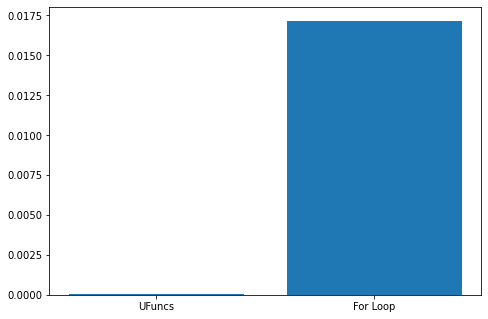

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
methods = ['UFuncs','For Loop']
results = [timeUFuncs.best, timeForLoop.best]
ax.bar(methods,results)
plt.show()

***
## Data Visualization <a name="datavisualization"></a>
_Statistica descrittiva tramite l'utilizzo di diverse tecniche di visualizzazione_

- Grafico età / partite giocate
- Distribuzione età / partite giocate
- Grafico di densità età / partite giocate
- Confronto delle posizioni

### Grafico età / partite giocate <a name="graph1"></a>

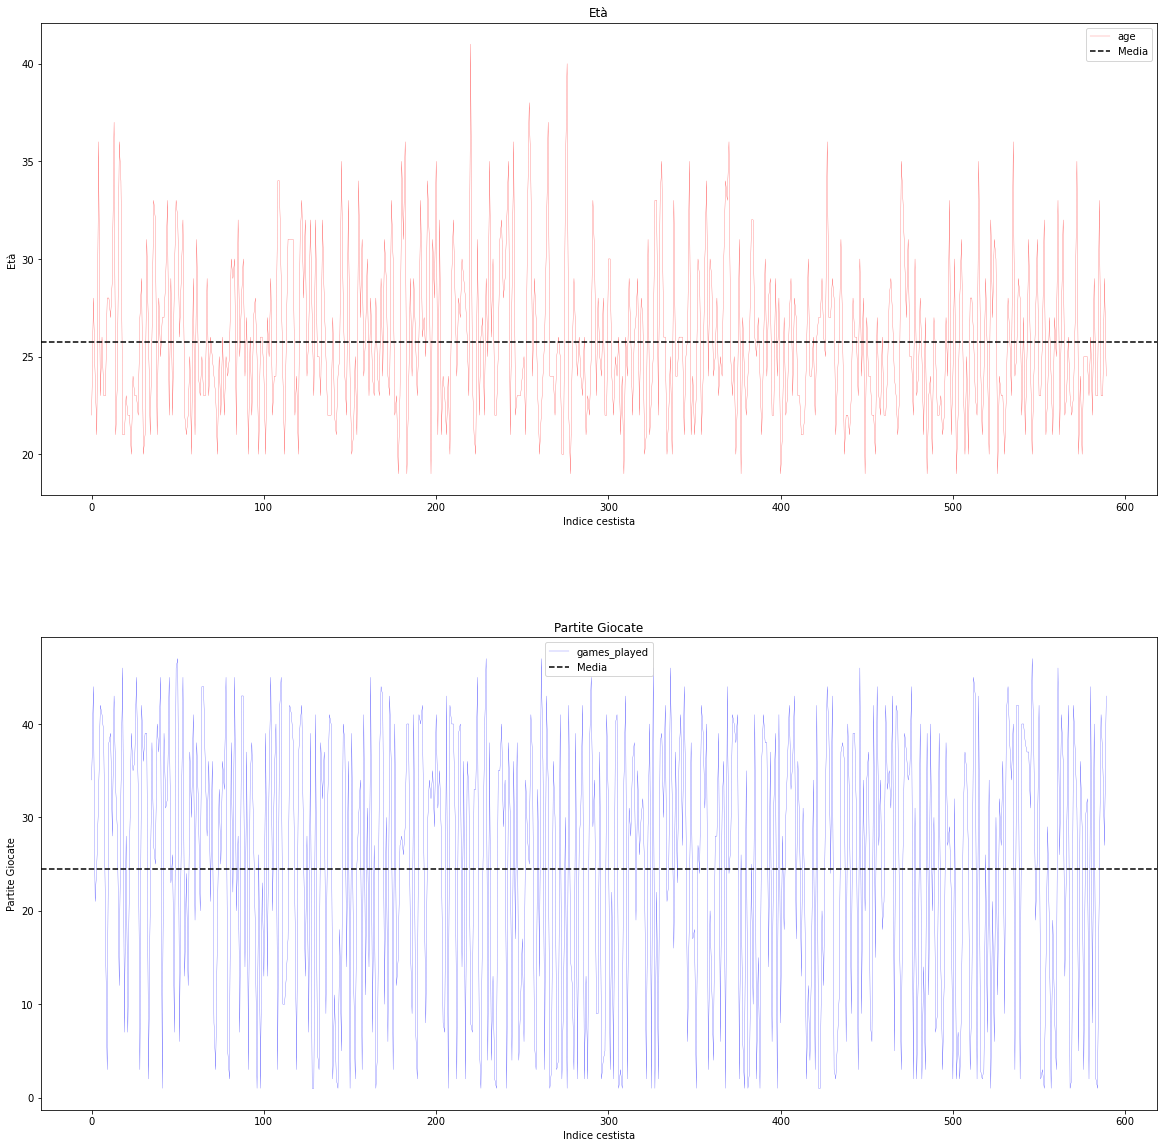

In [36]:
df_view_bar=df[df.age.notna() & df.games_played.notna()]

cols = ["age","games_played"]
colors = ["r","b"]
plt.figure(figsize=(20,20))

for index,col in enumerate(cols):
    plt.subplot(2,1,index+1)
    plt.plot(df_view_bar[col].to_numpy(),color = colors[index] ,linewidth =.2,label = cols[index])
    plt.axhline(df_view_bar[col].mean(), color = "black", linestyle = "dashed", label = "Media")
    plt.legend(loc= "best")
    plt.subplots_adjust(hspace = .3)
    
    plt.xlabel("Indice cestista")
    plt.ylabel("Partite Giocate" if col == "games_played" else "Età")
    plt.title("Partite Giocate" if col == "games_played" else "Età")
    
plt.show()

### Distribuzione età / partite giocate <a name="graph2"></a>

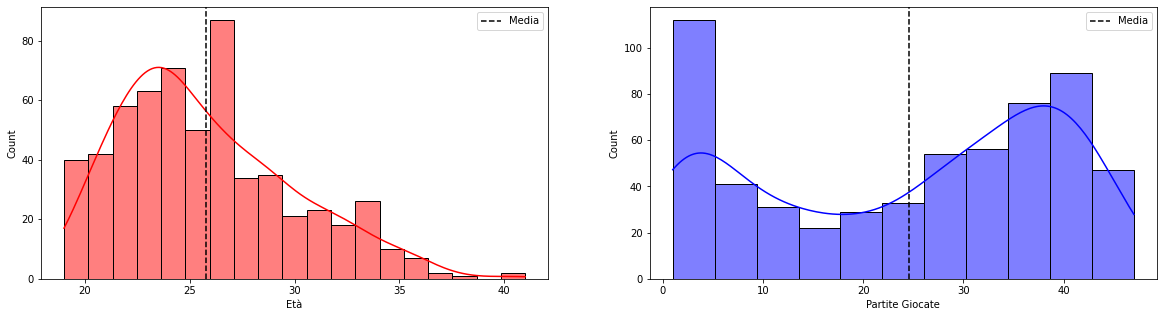

In [37]:
fig, axes = plt.subplots(1, len(cols), figsize=(20,5), squeeze=False)

for index, col in enumerate(cols):
    ax = axes[0, index]
    sns.histplot(list(df_view_bar[col]), color=colors[index], kde=True, ax=ax)
    ax.axvline(df_view_bar[col].mean(), color = "black", linestyle = "dashed", label="Media")
    ax.legend(loc="best")
    ax.set_xlabel("Partite Giocate" if col == "games_played" else "Età")
    
plt.show()

### Grafico di densità età / partite giocate <a name="graph3"></a>

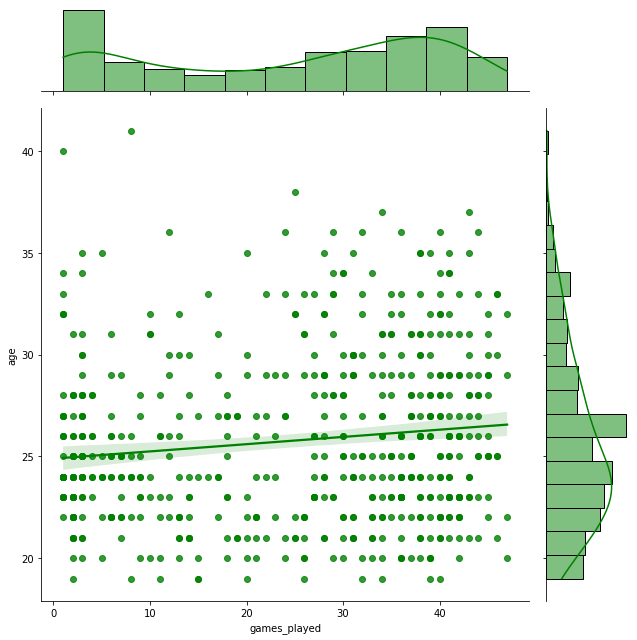

In [38]:
sns.jointplot(x=df_view_bar["games_played"],y=df_view_bar["age"], kind="reg",color="g", height = 9)
plt.show()

### Confronto delle posizioni<a name="graph4"></a>
Nomi delle posizioni:
   - C: Centro
   - PF: Ala grande
   - SF: Ala piccola
   - SG: Guardia Tiratrice
   - PG: Playmaker

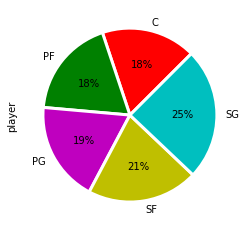

In [39]:
df_position = df.groupby('position').count()
df_position['player'].plot.pie(
    autopct = "%1.0f%%",
    wedgeprops = {
        "linewidth": 3,
        "edgecolor": "white"
    },
    colors = ["r", "g", "m", "y", "c"],
    startangle = 45
)
plt.show()

_Visualizzazione delle seguenti colonne: Punti, Assist, Blocchi, Falli, Turnovers, Rimbalzi offensivi e difensivi. Tutti i valori sono riferiti per partita giocata._

In [55]:
cols = [
    'points_per_game',
    'assists_per_game', 
    'blocks_per_game', 
    'personal_fouls_per_game', 
    'turnovers_per_game', 
    'offensive_rebounds_per_game', 
    'defensive_rebounds_per_game', 
    'free_throws_per_game',
    'steals_per_game'
]

df_position = df.groupby('position')
df_mean_view = df_position.mean()
df_mean = df_mean_view.loc[:,cols]
    
df_mean = df_mean.rename(columns={
    'points_per_game':  'Punti',
    'assists_per_game':  'Assist',
    'blocks_per_game':  'Blocchi',
    'personal_fouls_per_game':  'Falli',
    'turnovers_per_game':  'Turnovers',
    'offensive_rebounds_per_game': 'Rimbalzi offensivi',
    'defensive_rebounds_per_game': 'Rimbalzi difensivi',
    'free_throws_per_game': 'Tiri liberi',
    'steals_per_game': 'Steals'
})

df_mean

,Punti,Assist,Blocchi,Falli,Turnovers,Rimbalzi offensivi,Rimbalzi difensivi,Tiri liberi,Steals
position,,,,,,,,,
C,7.910577,1.199038,0.754808,1.921154,0.984615,1.705769,3.746154,1.359615,0.528846
PF,7.952294,1.353211,0.468807,1.678899,0.907339,1.026606,3.097248,1.303670,0.536697
PG,9.071818,3.344545,0.223636,1.481818,1.391818,0.426364,2.208182,1.414545,0.743636
SF,7.350000,1.290984,0.282787,1.458197,0.825410,0.666393,2.304098,1.012295,0.554918
SG,7.286897,1.574483,0.201379,1.291724,0.862069,0.429655,1.858621,0.893103,0.582759


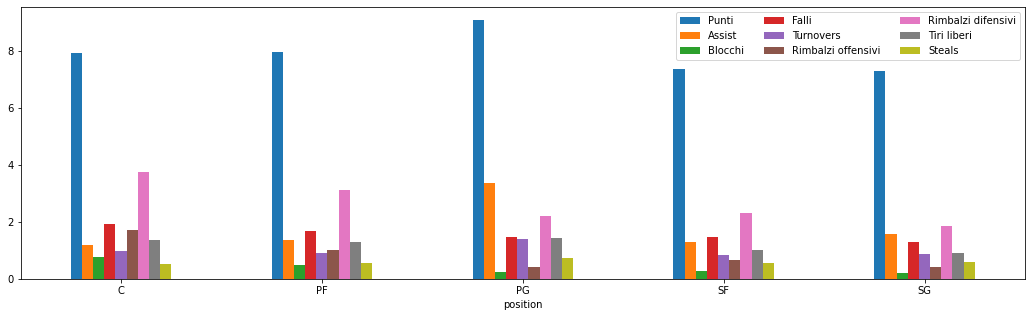

In [56]:
df_mean.plot.bar(rot=0,figsize=(18,5)).legend(ncol=3)
plt.show()

#### Scatter Plot 4d

In [45]:
df4 = df.copy()

_Assegnamento di un valore numerico per ogni ruolo_

In [46]:
df4.position = df4.position.str.replace('C', '0')
df4.position = df4.position.str.replace('SF', '1')
df4.position = df4.position.str.replace('PF', '2')
df4.position = df4.position.str.replace('SG', '3')
df4.position = df4.position.str.replace('PG', '4')


df4.position = df4.position.astype('int32')

_Assegnamento di un valore numerico per ogni team_

In [47]:
df4.team = df4.team.str.replace('TOR', '0')
df4.team = df4.team.str.replace('MEM', '1')
df4.team = df4.team.str.replace('MIA', '2')
df4.team = df4.team.str.replace('BRK', '3')
df4.team = df4.team.str.replace('NOP', '4')
df4.team = df4.team.str.replace('MIL', '5')
df4.team = df4.team.str.replace('CLE', '6')
df4.team = df4.team.str.replace('IND', '7')
df4.team = df4.team.str.replace('LAL', '8')
df4.team = df4.team.str.replace('ORL', '9')
df4.team = df4.team.str.replace('HOU', '10')
df4.team = df4.team.str.replace('WAS', '11')
df4.team = df4.team.str.replace('PHO', '12')
df4.team = df4.team.str.replace('UTA', '13')
df4.team = df4.team.str.replace('SAC', '14')
df4.team = df4.team.str.replace('CHO', '15')
df4.team = df4.team.str.replace('CHI', '16')
df4.team = df4.team.str.replace('ATL', '17')
df4.team = df4.team.str.replace('NYK', '18')
df4.team = df4.team.str.replace('DEN', '19')
df4.team = df4.team.str.replace('PHI', '20')
df4.team = df4.team.str.replace('SAS', '21')
df4.team = df4.team.str.replace('LAC', '22')
df4.team = df4.team.str.replace('OKC', '23')
df4.team = df4.team.str.replace('MIN', '24')
df4.team = df4.team.str.replace('DET', '25')
df4.team = df4.team.str.replace('GSW', '26')
df4.team = df4.team.str.replace('POR', '27')
df4.team = df4.team.str.replace('BOS', '28')
df4.team = df4.team.str.replace('DAL', '29')

df4.team = df4.team.astype('int32')

_Il seguente grafico mostra una visualizzazione per i blocchi._

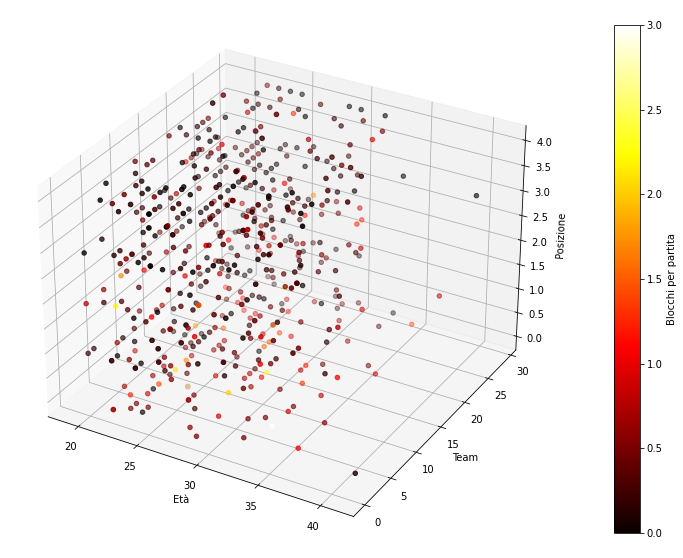

In [48]:
x = df4.age
y = df4.team
z = df4.position
c_dim = df4.blocks_per_game

fig = plt.figure(figsize=(25, 10))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_xlabel('Età')
ax.set_ylabel('Team')
ax.set_zlabel('Posizione')
img = ax.scatter(x, y, z, c=c_dim, cmap=plt.hot())
fig.colorbar(img, fraction=0.04, pad=0.1, label='Blocchi per partita')

plt.show()

_Dal grafico risulta che il ruolo che effetta maggiori blocchi è il Centro._

---
## Machine Learning <a name="ml"></a>

_Analisi delle correlazioni delle funzionalità e apprendimento automatico sui cestisti che hanno realizzato almeno un punto._

### Analisi delle correlazioni<a name="graph5"></a>

_Tutti i valori non numerici sono rimpiazzati con numeri da 0 fino al massimo del valore univoco della colonna._

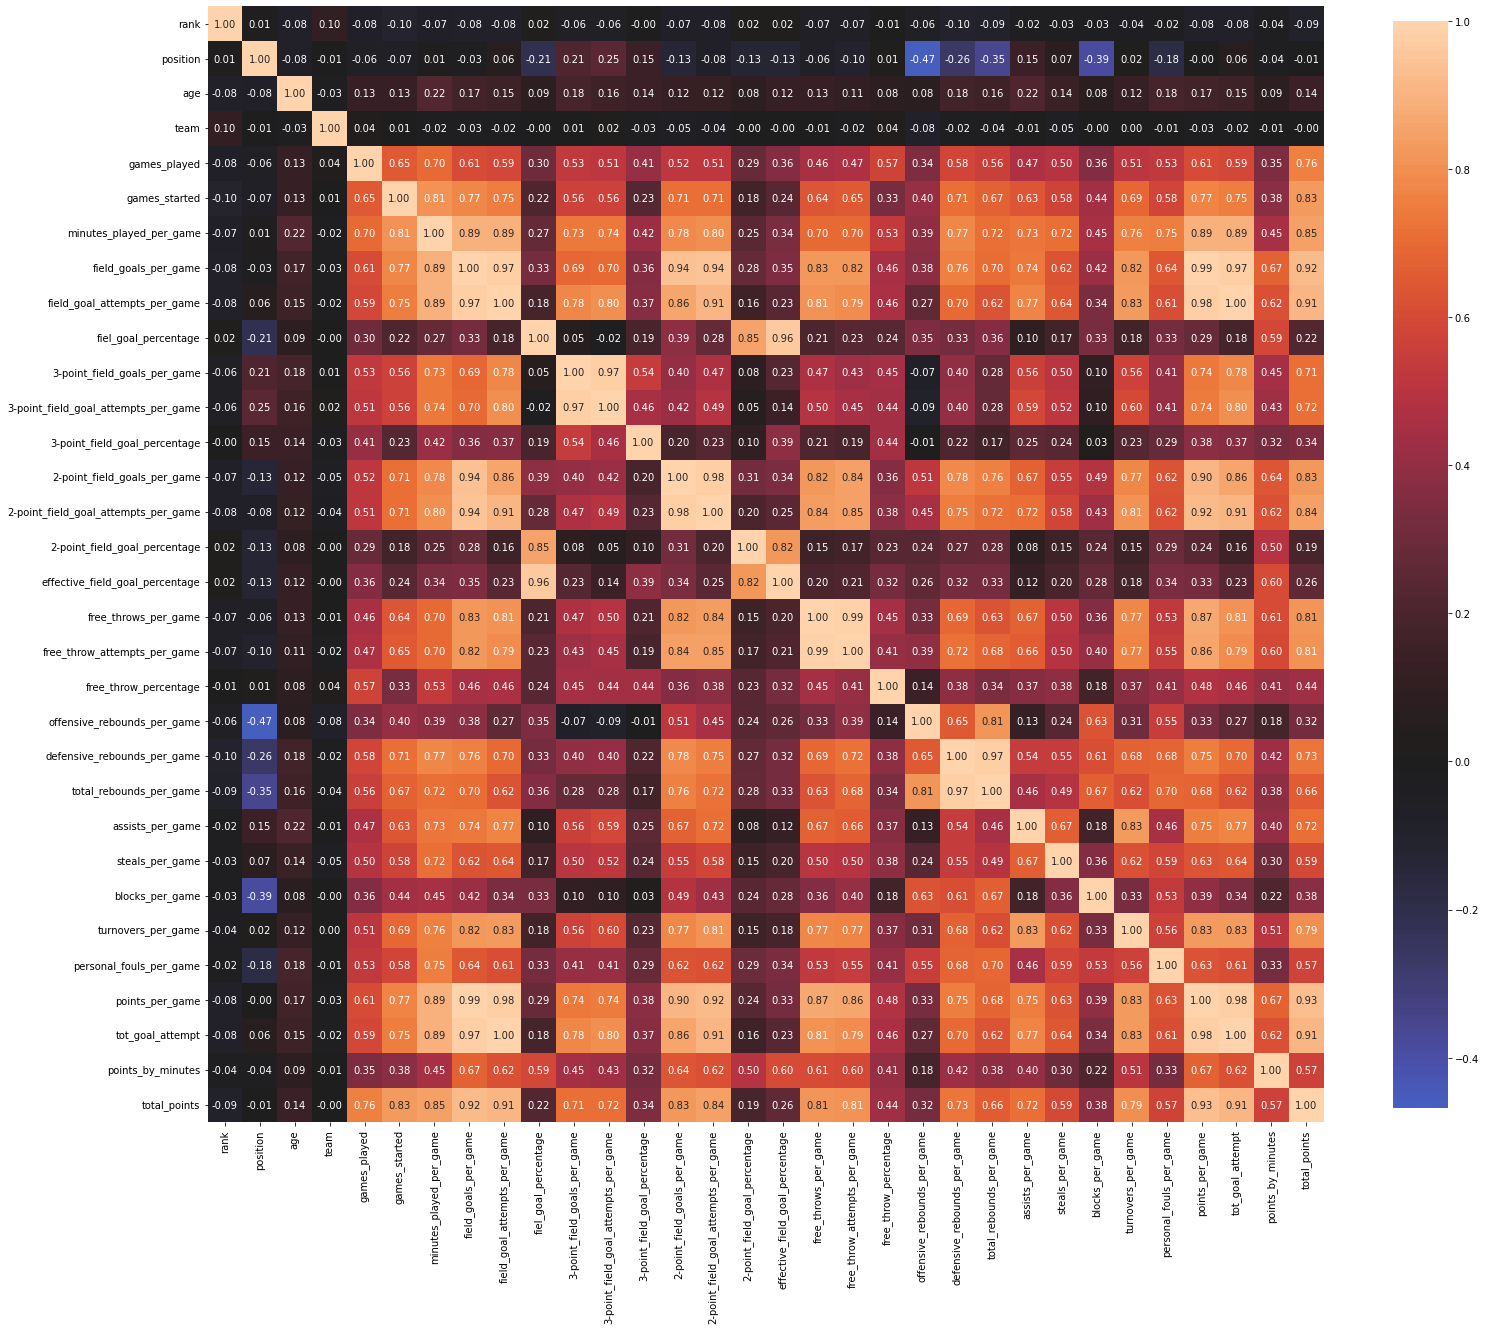

In [107]:
df_copy = df.copy()

for col_name in ['position', 'team']:
    for i, v in enumerate(df_copy[col_name].unique()):
        df_copy[col_name] = df_copy[col_name].str.replace(v, str(i))
    df_copy[col_name] = df_copy[col_name].astype('int32')
    
df_corr = df_copy.corr()

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(
    df_corr, 
    vmax=1.0, 
    center=0, 
    fmt='.2f', 
    square=True, 
    annot=True, 
    cbar_kws={"shrink": .8})
plt.show()

_Principali correlazioni_

In [111]:
df_corr1 = df_corr[((df_corr >= 0.8) | (df_corr <= -0.8)) & (df_corr !=1.000)]
df_corr1.unstack().sort_values(ascending=False).drop_duplicates().dropna()

tot_goal_attempt                      field_goal_attempts_per_game            0.999989
points_per_game                       field_goals_per_game                    0.991264
free_throws_per_game                  free_throw_attempts_per_game            0.985976
tot_goal_attempt                      points_per_game                         0.977573
points_per_game                       field_goal_attempts_per_game            0.977566
2-point_field_goal_attempts_per_game  2-point_field_goals_per_game            0.976163
3-point_field_goals_per_game          3-point_field_goal_attempts_per_game    0.972948
defensive_rebounds_per_game           total_rebounds_per_game                 0.972350
tot_goal_attempt                      field_goals_per_game                    0.971526
field_goal_attempts_per_game          field_goals_per_game                    0.971504
fiel_goal_percentage                  effective_field_goal_percentage         0.960202
2-point_field_goal_attempts_per_game  field